**LLM - Detect AI Generated Text
Identify which essay was written by a large language model**

Shivarjun Umesha 

1002059222

In [275]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Dataset

In [276]:
df = pd.read_csv('/Users/shivarjunpawan/Desktop/DM_Assignment2/train_essays.csv', encoding='latin1')
print(df.head())

         id  prompt_id                                               text  \
0  0059830c        0.0  Cars. Cars have been around since they became ...   
1  005db917        0.0  Transportation is a large necessity in most co...   
2  008f63e3        0.0  "America's love affair with it's vehicles seem...   
3    940276        0.0  How often do you ride in a car? Do you drive a...   
4  00c39458        0.0  Cars are a wonderful thing. They are perhaps o...   

   generated  
0          0  
1          0  
2          0  
3          0  
4          0  


Data Preprocessing

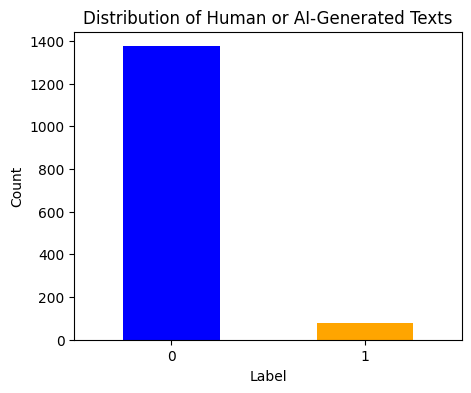

In [277]:
import matplotlib.pyplot as plt
label_counts = df['generated'].value_counts()
plt.figure(figsize=(5, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Human or AI-Generated Texts')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Droping of attributes 'id' & 'Prompt_id'

In [278]:
df.drop(['id', 'prompt_id'], axis=1, inplace=True)
print(df.head())

                                                text  generated
0  Cars. Cars have been around since they became ...          0
1  Transportation is a large necessity in most co...          0
2  "America's love affair with it's vehicles seem...          0
3  How often do you ride in a car? Do you drive a...          0
4  Cars are a wonderful thing. They are perhaps o...          0


Building Vocabulary function

In [279]:
from sklearn.feature_extraction.text import CountVectorizer
def build_vocabulary(texts):
    vectorizer = CountVectorizer()
    vectorizer.fit(texts)
    vocabulary = vectorizer.get_feature_names()
    return vocabulary
print("Build Vocabulary")

Build Vocabulary


Naive Bayes function

In [281]:
def naive_bayes(train_data, target_labels, test_data, smoothing_alpha=1e-10):
    vectorizer = CountVectorizer(binary=True)
    X_train_vec = vectorizer.fit_transform(train_data)
    X_test_vec = vectorizer.transform(test_data)
    class_probabilities = {}
    feature_probabilities = {}
    unique_classes = np.unique(target_labels)
    for current_class in unique_classes:
        class_probabilities[current_class] = np.sum(target_labels == current_class) / len(target_labels)
        feature_probabilities[current_class] = (
            X_train_vec[target_labels == current_class].sum(axis=0) + smoothing_alpha
        ) / (np.sum(target_labels == current_class) + 2 * smoothing_alpha)
    predictions = np.argmax(
        [
            np.log(class_probabilities[current_class])
            + X_test_vec @ np.log(feature_probabilities[current_class].T + 1e-10)
            for current_class in unique_classes
        ],
        axis=0,
    )

    return predictions


In [282]:
X = df['text']
y = df['generated']

Calculate the following probability

In [283]:
word_of_interest = 'was' 
probability_word, probability_word_given_class = calculate_probabilities(df, word_of_interest)
print(f"Word: {word_of_interest}")
print(f"Probability of occurrence in the entire dataset: {probability_word:.4f}")
if probability_word_given_class is not None:
    print(f"Probability of occurrence given the class: {probability_word_given_class:.4f}")
else:
    print("Conditional probability not calculated for the entire dataset.")


Word: was
Probability of occurrence in the entire dataset: 0.6823
Conditional probability not calculated for the entire dataset.


Trainig the model 

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [285]:
y_pred = naive_bayes(X_train, y_train, X_test)

Finding Accuracy and classification report 

In [286]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9565217391304348
Confusion Matrix:
[[408   0]
 [ 19  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       408
           1       1.00      0.34      0.51        29

    accuracy                           0.96       437
   macro avg       0.98      0.67      0.75       437
weighted avg       0.96      0.96      0.95       437



Submission.csv

In [292]:
test_data = pd.read_csv('test_essays.csv')
test_data = test_data['text']

In [293]:
test_data

0    Aaa bbb ccc.
1    Bbb ccc ddd.
2    CCC ddd eee.
Name: text, dtype: object